# バックテスト検証ノート

In [1]:
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [3]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/ubuntu/repo/bakuchi


In [4]:
from src.utils.backtesting import Backtesting, run_backtesting

%reload_ext autoreload
%autoreload 2

In [5]:
bt = Backtesting(timestamp)

In [6]:
df_ex1 = bt.get_coincheck_df()
df_ex2 = bt.get_liquid_df()

In [7]:
len(df_ex1), len(df_ex2)

(912, 912)

## テスト実行

In [8]:
bt.run()

##  取引履歴

In [9]:
arbitrage_histories = bt.get_arbitrage_histories()

headers = ["取引日時", "購入取引所", "売却取引所", "通貨ペア", "取引量", "期待利益"]
arbitrage_histories_df = pd.DataFrame(arbitrage_histories, columns=headers)
arbitrage_histories_df

,取引日時,購入取引所,売却取引所,通貨ペア,取引量,期待利益
0,2021-04-15 16:23:09,liquid,bitbank,BTC/JPY,0.0007,1
1,2021-04-15 16:24:08,bitbank,liquid,BTC/JPY,0.0007,1
2,2021-04-15 16:24:11,bitbank,liquid,BTC/JPY,0.0007,2
3,2021-04-15 16:24:20,liquid,bitbank,BTC/JPY,0.0007,-1
4,2021-04-15 16:24:21,bitbank,liquid,BTC/JPY,0.0007,1
5,2021-04-15 16:24:27,liquid,bitbank,BTC/JPY,0.0007,0
6,2021-04-15 16:24:39,bitbank,liquid,BTC/JPY,0.0007,1
7,2021-04-15 16:24:40,liquid,bitbank,BTC/JPY,0.0007,0
8,2021-04-15 16:24:41,bitbank,liquid,BTC/JPY,0.0007,1
9,2021-04-15 16:24:48,liquid,bitbank,BTC/JPY,0.0007,0


In [10]:
histories = bt.get_trade_histories()
headers = ["取引日時",  "売買",  "取引所", "レート"]
histories_df = pd.DataFrame(histories, columns=headers)
histories_df

,取引日時,売買,取引所,レート
0,2021-04-15 16:23:09,liquid,買い,6875985.0
1,2021-04-15 16:23:09,bitbank,売り,6878000.0
2,2021-04-15 16:24:08,bitbank,買い,6860204.0
3,2021-04-15 16:24:08,liquid,売り,6861920.0
4,2021-04-15 16:24:11,bitbank,買い,6860204.0
...,...,...,...,...
59,2021-04-15 16:34:24,bitbank,売り,6863157.0
60,2021-04-15 16:36:18,bitbank,買い,6860001.0
61,2021-04-15 16:36:18,liquid,売り,6863233.0
62,2021-04-15 16:38:24,liquid,買い,6869661.0


## 結果まとめ

In [11]:
bt.display()

バックテスト情報
-------------------  -------------------
         レコード数                  912
           取引回数                   32
           開始日時  2021-04-15 16:22:46
           終了日時  2021-04-15 16:38:34
        取引時間[H]      0 days 00:15:48
      取引単位[BTC]               0.0007
  利確しきい値[JPY]                 4956
損切りマージン[JPY]                 1000
-------------------  -------------------

バックテスト結果
-----------  ------
開始[JPY]     10000
終了[JPY]     10019
利益[JPY]        19
開始[BTC]     0.022
終了[BTC]     0.022
利益[BTC]         0
開始[TOTAL]  161197
終了[TOTAL]  161217
利益[TOTAL]  19.936
-----------  ------


## グラフ出力

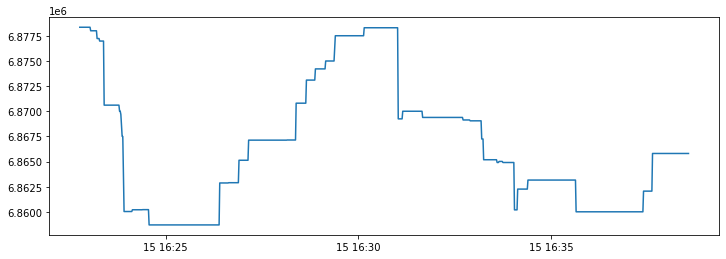

In [12]:
plt.figure(figsize=(12,4))
plt.plot(df_ex1.index, df_ex1['bid'])

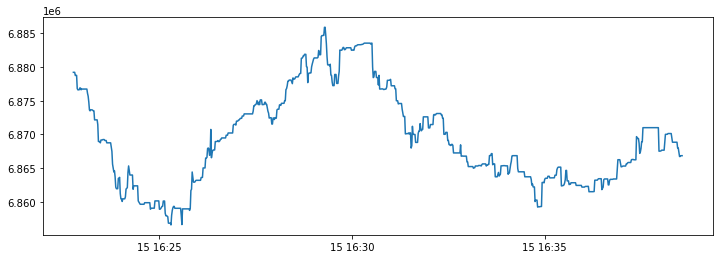

In [13]:
plt.figure(figsize=(12,4))
plt.plot(df_ex2.index, df_ex2['bid'])

## 分析

### 時間別の取引回数と利益

### 時間別の価格差の推移

In [14]:
profit_margin_df = pd.DataFrame({
    "timestamp": pd.to_datetime(df_ex1.index),
    "buy_ex1_sell_ex2": df_ex2.reset_index().bid - df_ex1.reset_index().ask,
    "buy_ex2_sell_ex1": df_ex1.reset_index().bid - df_ex2.reset_index().ask,
    'ex1_bid': df_ex1.reset_index().bid,
     'ex2_ask': df_ex2.reset_index().ask,
    'ex2_bid': df_ex2.reset_index().bid,
    'ex1_ask': df_ex1.reset_index().ask,
})

profit_margin_df = profit_margin_df.set_index("timestamp")

In [15]:
pd.options.display.float_format = '{:.0f}'.format
profit_margin_df.resample(rule='10Min').mean()

,buy_ex1_sell_ex2,buy_ex2_sell_ex1,ex1_bid,ex2_ask,ex2_bid,ex1_ask
timestamp,,,,,,
2021-04-15 16:20:00,3978,-4107,6866887,6870994,6870414,6866436
2021-04-15 16:30:00,1915,-2400,6866319,6868719,6868349,6866434
